In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats.mstats import zscore

plt.style.use("dark_background")

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


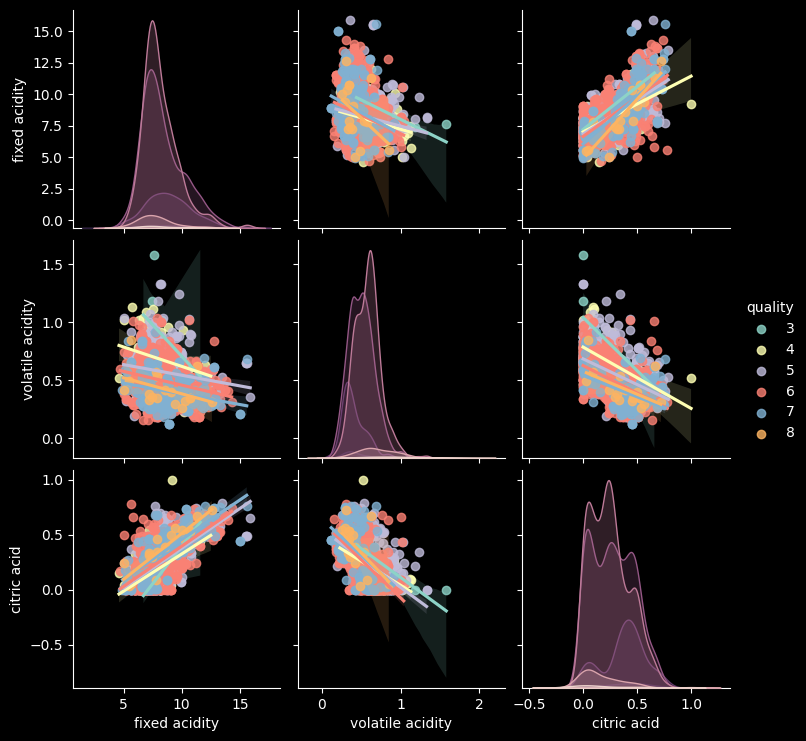

In [ ]:
# pairwise plots
cols2plot = ['fixed acidity','volatile acidity','citric acid','quality']
sns.pairplot(data[cols2plot],kind='reg',hue='quality')
plt.show()

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<ipython-input-132-ab71234a6240>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


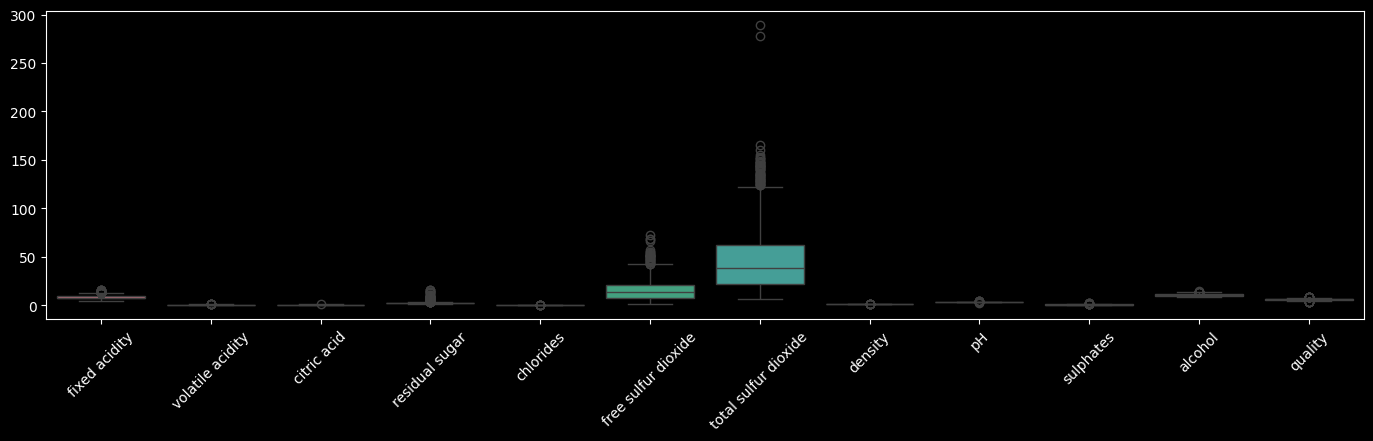

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [ ]:
data = data.loc[data["total sulfur dioxide"] < 200]


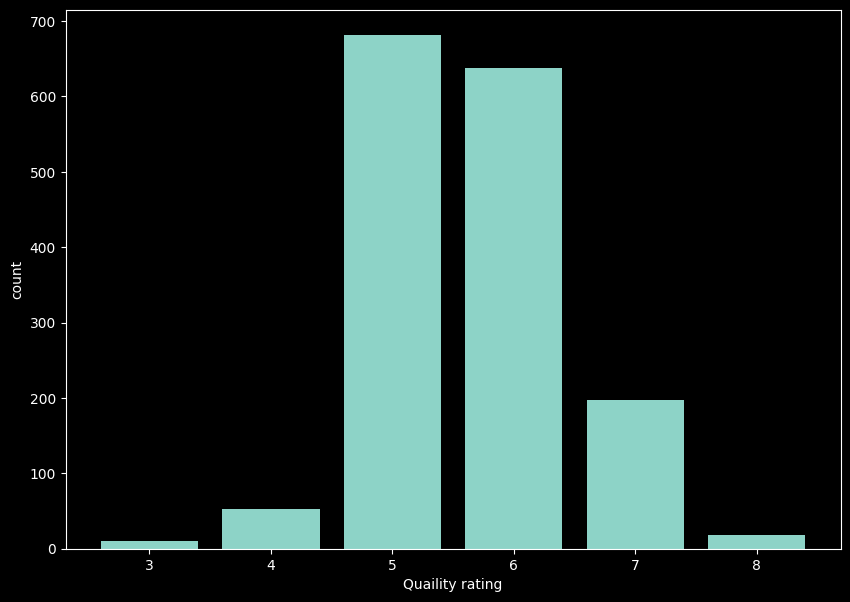

In [ ]:
fig = plt.figure(figsize=(10, 7))
counts = data["quality"].value_counts()

plt.bar(list(counts.keys()), counts)
plt.xlabel("Quaility rating")
plt.ylabel("count")
plt.show()

In [ ]:
data["bool quality"] = 0
# data.loc["bool quality"] = 0
data.loc[data["quality"] > 5, "bool quality"] = 1
data.sample(10)

# data.loc[data["quality"] < 5] = 0
# data.loc[data["quality"] >= 5] = 1

<ipython-input-135-837ac2d37623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bool quality"] = 0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bool quality
235,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,1
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5,0
1105,6.3,0.570,0.28,2.1,0.048,13.0,49.0,0.99374,3.41,0.60,12.8,5,0
510,12.4,0.420,0.49,4.6,0.073,19.0,43.0,0.99780,3.02,0.61,9.5,5,0
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6,1
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,1
122,7.3,0.695,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,9.2,5,0
351,9.1,0.795,0.00,2.6,0.096,11.0,26.0,0.99940,3.35,0.83,9.4,6,1
285,9.9,0.590,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,5,0
196,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.99680,3.46,0.59,10.2,5,0


In [ ]:
cols2zscore = data.drop("quality", axis=1)
cols2zscore = data.drop("bool quality", axis=1)
cols2zscore = cols2zscore.keys()
cols2zscore

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# for col in cols2zscore:
#     meanval = np.mean(data[col])
#     stdev = np.std(data[col], ddof=1)
#     data[col] = (data[col]-meanval) / stdev
#
# data.describe()

data[cols2zscore].apply(lambda x: zscore(x, axis=1, ddof=1))

AxisError: axis 1 is out of bounds for array of dimension 1

<ipython-input-115-0210bac4b14c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'fixed acidity'),
 Text(1, 0, 'volatile acidity'),
 Text(2, 0, 'citric acid'),
 Text(3, 0, 'residual sugar'),
 Text(4, 0, 'chlorides'),
 Text(5, 0, 'free sulfur dioxide'),
 Text(6, 0, 'total sulfur dioxide'),
 Text(7, 0, 'density'),
 Text(8, 0, 'pH'),
 Text(9, 0, 'sulphates'),
 Text(10, 0, 'alcohol'),
 Text(11, 0, 'quality'),
 Text(12, 0, 'bool quality')]

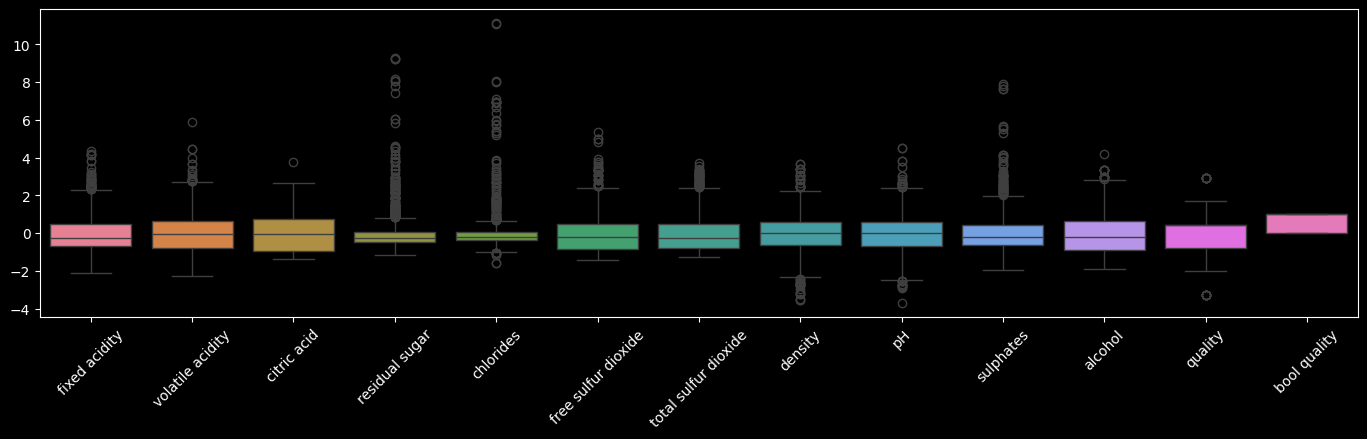

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
cols2zscore = cols2zscore.drop("quality")

In [ ]:
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["bool quality"].values).float()
print(f"dataT.shape: {dataT.shape},\n\nlabels.shape: {labels.shape}")

dataT.shape: torch.Size([1597, 11]),

labels.shape: torch.Size([1597])


In [ ]:
labels

tensor([0., 0., 0.,  ..., 1., 0., 1.])

In [ ]:
labels = labels.reshape(-1, 1)
labels.shape

torch.Size([1597, 1])

In [ ]:
class WineModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.input    = nn.Linear(11, 16)
        self.hidden_1 = nn.Linear(16, 32)
        self.hidden_2 = nn.Linear(32, 32)
        self.output   = nn.Linear(32, 1)

    def forward(self, x):
        x = self.input(x)
        x = F.relu(x)

        x = self.hidden_1(x)
        x = F.relu(x)

        x = self.hidden_2(x)
        x = F.relu(x)

        x = self.output(x)

        return x

In [ ]:
def train_model(model:nn.Module,
                train_loader:torch.utils.data.DataLoader,
                test_loader:torch.utils.data.DataLoader,
                epochs:int=1500,
                L1lambda=None,
                L2lambda=None):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    losses = []
    trainAccs = []
    valAccs = []

    nWeights = 0
    for pname, weight in model.named_parameters():
        if "bias" not in pname:
            nWeights += 1

    for i in range(epochs):

        batchLosses = []
        batchAccs = []
        for X, y in train_loader:
            y_pred = model(X)
            loss = criterion(y_pred, y)

            # L1 Reg
            if L1lambda != None:
                L1_term = 0
                for pname, weight in model.named_parameters():
                    if "bias" not in pname:
                        L1_term = L1_term + torch.sum(torch.abs(weight))
                loss = loss + L1lambda * L1_term / nWeights
            # L2 Reg
            if L2lambda != None:
                L2_term = 0
                for pname, weight in model.named_parameters():
                    if "bias" not in pname:
                        L2_term = L2_term + torch.sum(torch.abs(weight))
                loss = loss + L2lambda * torch.square(torch.tensor(L2_term)) / nWeights

            batchLosses.append(loss)

            # Batch Acc
            acc = 100 * torch.mean(((y_pred > 0) == y).float())
            batchAccs.append(acc)

        batchLosses = torch.tensor(batchLosses).float()
        losses.append(torch.mean(batchLosses))

        batchAccs = torch.tensor(batchAccs).float()
        trainAccs.append(torch.mean(batchAccs))

        X, y = next(iter(testLoader))
        y_pred = model(X)
        valAcc = 100 * torch.mean(((y_pred > 0) == y).float())
        valAccs.append(valAcc)
        print(valAcc)

    return losses, trainAccs, valAccs

In [ ]:
# a function that trains the model

# global parameter
numepochs = 1000

def trainTheModel(model:nn.Module,
                train_loader:torch.utils.data.DataLoader,
                test_loader:torch.utils.data.DataLoader,
                epochs:int=1500,
                L1lambda=None,
                L2lambda=None):

  # loss function and optimizer
  lossfun = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(model.parameters(),lr=.01)

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    model.train()

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = model(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute training accuracy for this batch
      batchAcc.append( 100*torch.mean(((yHat>0) == y).float()).item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    model.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = model(X)
      valAcc =  100*torch.mean(((yHat>0) == y).float()).item()
    testAcc.append( valAcc )

  # function output
  return trainAcc,testAcc,losses

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(dataT, labels, test_size=0.2, shuffle=True, random_state=42)

trainDataset = TensorDataset(data_train, label_train)
testDataset = TensorDataset(data_test, label_test)

batch_size=64
trainLoader = DataLoader(trainDataset, batch_size=batch_size, shuffle=True, drop_last=True)
testLoader = DataLoader(testDataset, batch_size=testDataset.tensors[0].shape[0])

In [ ]:
testDataset.tensors[0].shape[0]

320

In [ ]:
for X, y in trainLoader:
    print("X.shape:", X.shape, "  y.shape:", y.shape)

X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64, 11])   y.shape: torch.Size([64, 1])
X.shape: torch.Size([64,

In [ ]:
wineQualityModel = WineModel()
losses, trainAccs, valAccs = trainTheModel(model=wineQualityModel, train_loader=trainLoader, test_loader=testLoader, epochs=1000)

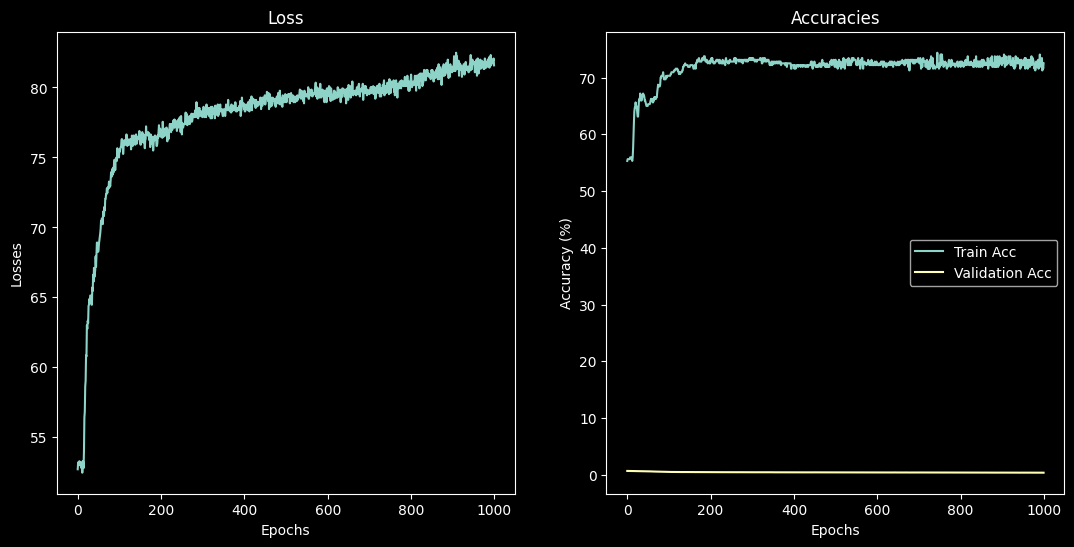

In [ ]:
with torch.no_grad():
    fig = plt.figure(figsize=(13, 6))
    ax0 = fig.add_subplot(121)
    ax1 = fig.add_subplot(122)

    ax0.set_title("Loss")
    ax0.plot(losses)
    ax0.set_xlabel("Epochs")
    ax0.set_ylabel("Losses")

    ax1.set_title("Accuracies")
    ax1.plot(trainAccs, label="Train Acc")
    ax1.plot(valAccs, label="Validation Acc")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy (%)")
    ax1.legend()
    plt.show()
